In [5]:
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing
import matplotlib.pyplot as plt

In [6]:
# KNN class definition
class KNN:
    
    def __init__(self, k, data_size=None):
        self.k = k
        self.data_size = data_size
 # Fit function to store training data    
    def fit(self, X, y):
        # If data_size is specified, limit the training data to data_size
        if self.data_size is not None:
            X = X[:self.data_size]
            y = y[:self.data_size]
        self.X_train = X
        self.y_train = y
 # Predict function to make predictions on test data    
    def predict(self, X, true_labels=None):
        # Get the number of test instances
        num_test = X.shape[0]
         # Initialize an empty array for storing predictions
        y_pred = np.zeros(num_test, dtype=self.y_train.dtype)
        # Get the number of CPU cores for parallel computation
        num_cores = multiprocessing.cpu_count()
 # Function to find k nearest labels for each test instance    
        def get_k_nearest_labels(i):
         # Calculate the Euclidean distances between the test instance and all training instances
            distances = np.sum((self.X_train - X[i, :])**2, axis=1)
            # Get the indices of the training instances sorted by their distances to the test instance
            sorted_indices = np.argsort(distances)
            # Get the labels of the k nearest training instances
            k_nearest_labels = self.y_train[sorted_indices[:self.k]]
             # Return the most frequent label among the k nearest labels and the k nearest labels themselves
            return np.bincount(k_nearest_labels).argmax(), k_nearest_labels
 # Parallelize the computation of k nearest labels for all test instances    
        results = Parallel(n_jobs=num_cores)(
            delayed(get_k_nearest_labels)(i) for i in range(num_test)
        )
 # Store the predictions and print the prediction and neighbor labels for each test instance   
        for i, (pred, neighbors) in enumerate(results):
            
            y_pred[i] = pred
            if true_labels is not None and pred != true_labels[i]:
                print(f"  Wrong prediction. Dataset line: {i + 1}")
                self.display_image(X[i], pred, true_labels[i])
        return np.array(y_pred)
    @staticmethod
    def display_image(image_data, predicted_label, true_label):
        plt.imshow(image_data.reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_label}, True: {true_label}")
        plt.show()

In [7]:
# Read the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Extract the labels from the data
train_labels = train_data['label'].values
test_labels = test_data['label'].values

# Normalize the pixel values
train_data = (train_data.iloc[:, 1:].values / 255.0).astype(np.float32)
test_data = (test_data.iloc[:, 1:].values / 255.0).astype(np.float32)


In [ ]:
# Define a list of k values to try
k_range = range(1, 20)  # Set the k range here

# Perform k-fold cross validation to select the best k value
num_folds = 9  # Set the number of folds for cross-validation here
data_size = 2000  # Set the data size here
train_data = train_data[:data_size]
train_labels = train_labels[:data_size]
fold_size = train_data.shape[0] // num_folds
accuracies = []
train_accuracies = []

for k in k_range:
    knn = KNN(k=k)
    fold_accuracies = []
    fold_train_accuracies = []

    for i in range(num_folds):
        # Split the data into training and validation sets
        start = i * fold_size
        end = (i + 1) * fold_size
        val_data = train_data[start:end]
        val_labels = train_labels[start:end]
        train_data_fold = np.concatenate([train_data[:start], train_data[end:]])
        train_labels_fold = np.concatenate([train_labels[:start], train_labels[end:]])
        print(f"  Processing fold {i + 1}/{num_folds}, validation data indices: {start}-{end - 1}")

        # Train the model on the training data
        knn.fit(train_data_fold, train_labels_fold)

        # Evaluate the model on the validation data
        y_val_pred = knn.predict(val_data)
        fold_accuracy = np.mean(y_val_pred == val_labels)
        fold_accuracies.append(fold_accuracy)

        # Evaluate the model on the training data
        y_train_pred = knn.predict(train_data_fold)
        fold_train_accuracy = np.mean(y_train_pred == train_labels_fold)
        fold_train_accuracies.append(fold_train_accuracy)
        print(f"  Fold {i + 1} complete. Remaining data sets: {num_folds - i - 1}")

    # Compute the average accuracy across all folds for this k value
    mean_accuracy = np.mean(fold_accuracies)
    accuracies.append(mean_accuracy)

    mean_train_accuracy = np.mean(fold_train_accuracies)
    train_accuracies.append(mean_train_accuracy)

    # Display the training and validation accuracy for each k value
    print(f"k: {k}, Training accuracy: {mean_train_accuracy}, Validation accuracy: {mean_accuracy}")

# Select the best k value based on the highest validation accuracy
best_k = k_range[np.argmax(accuracies)]
print("Best k value:", best_k)

# Plot the training and validation accuracies for each k value
plt.plot(k_range, train_accuracies, label="Training accuracy")
plt.plot(k_range, accuracies, label="Validation accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracies for Different k Values")
plt.show()


  Processing fold 1/9, validation data indices: 0-221
  Fold 1 complete. Remaining data sets: 8
  Processing fold 2/9, validation data indices: 222-443
  Fold 2 complete. Remaining data sets: 7
  Processing fold 3/9, validation data indices: 444-665
  Fold 3 complete. Remaining data sets: 6
  Processing fold 4/9, validation data indices: 666-887


  Wrong prediction. Dataset line: 41


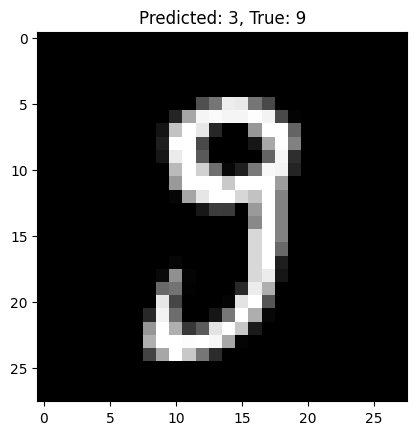

  Wrong prediction. Dataset line: 77


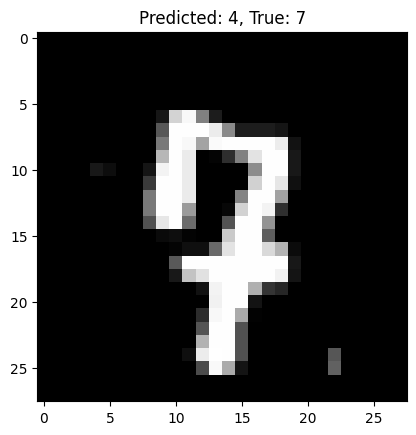

  Wrong prediction. Dataset line: 96


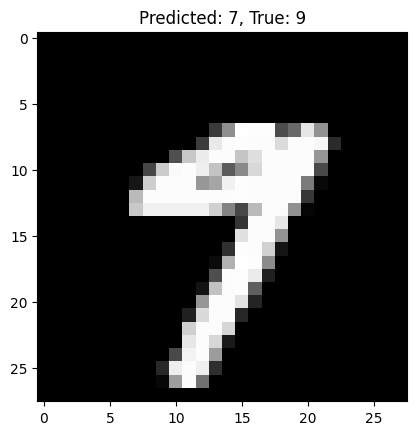

  Wrong prediction. Dataset line: 126


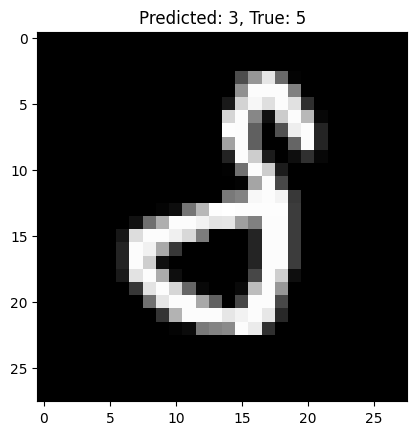

  Wrong prediction. Dataset line: 361


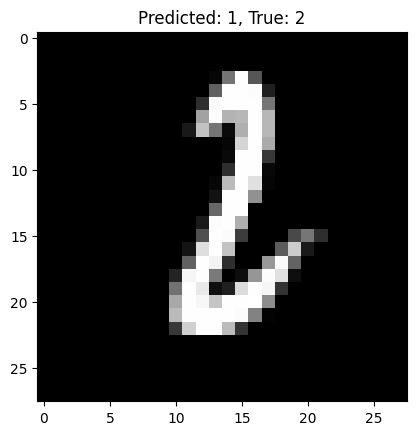

  Wrong prediction. Dataset line: 378


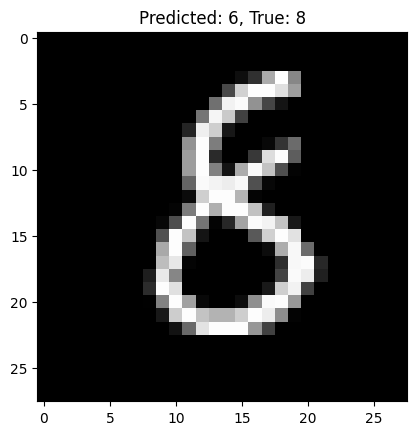

  Wrong prediction. Dataset line: 430


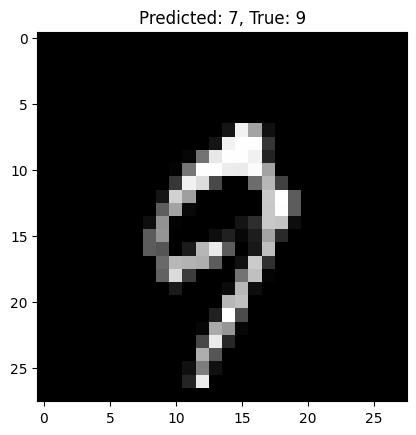

  Wrong prediction. Dataset line: 435


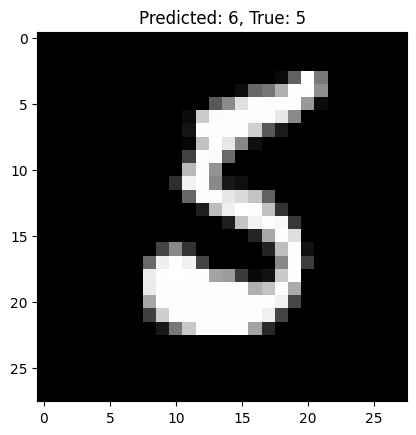

  Wrong prediction. Dataset line: 468


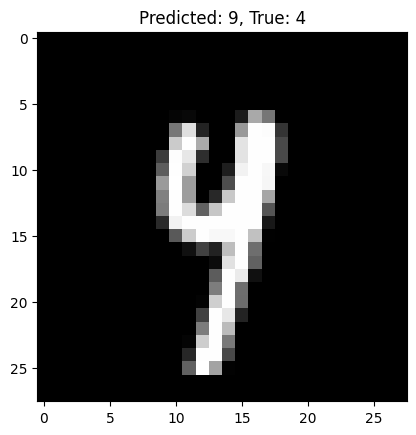

  Wrong prediction. Dataset line: 529


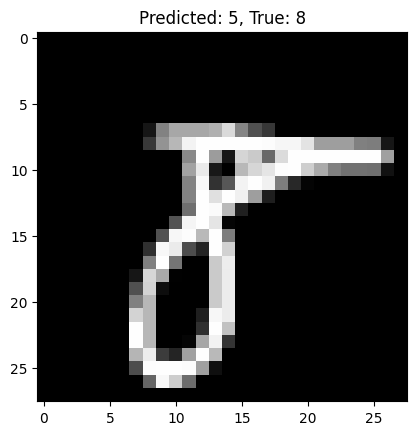

  Wrong prediction. Dataset line: 540


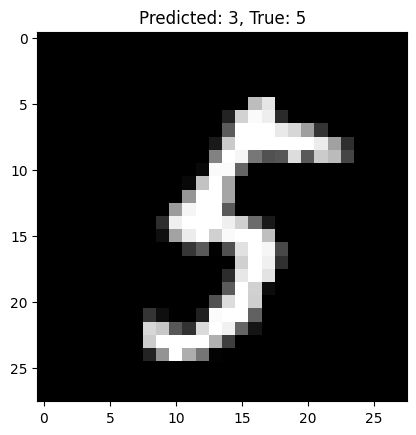

  Wrong prediction. Dataset line: 560


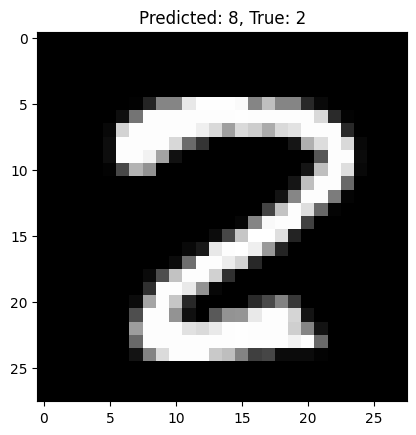

  Wrong prediction. Dataset line: 578


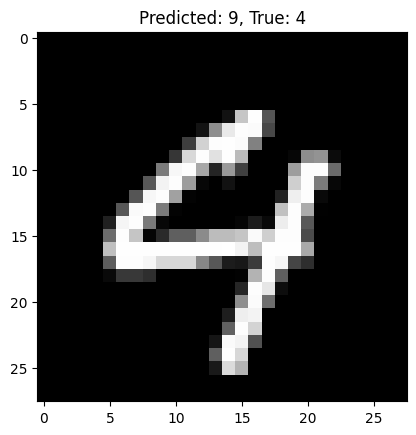

  Wrong prediction. Dataset line: 579


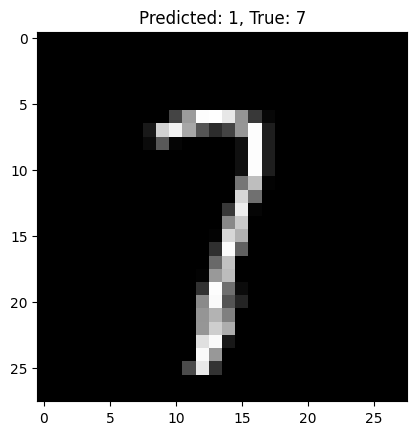

  Wrong prediction. Dataset line: 609


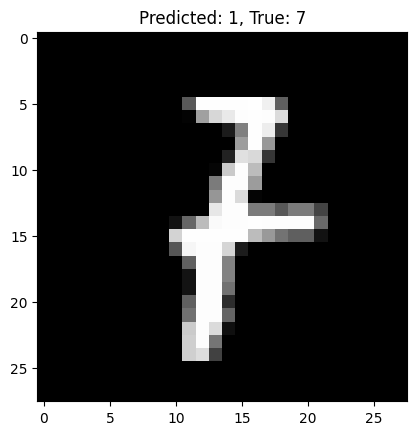

  Wrong prediction. Dataset line: 623


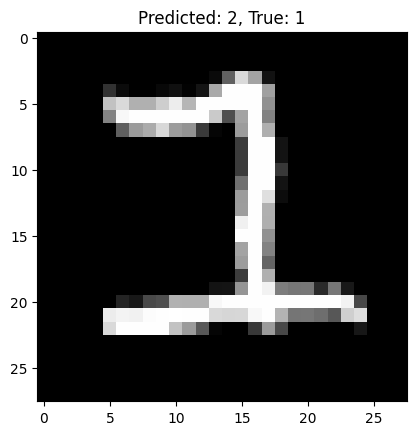

  Wrong prediction. Dataset line: 645


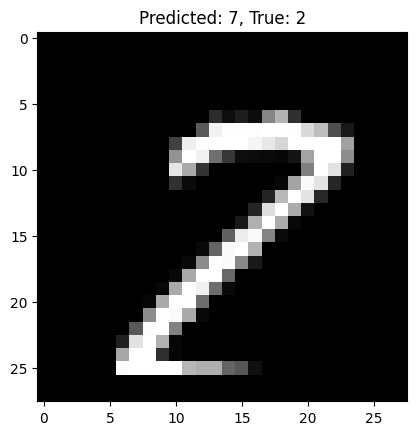

  Wrong prediction. Dataset line: 691


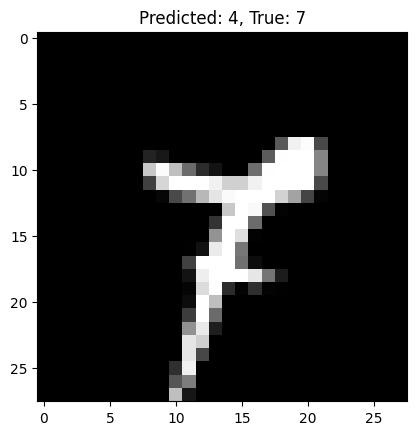

  Wrong prediction. Dataset line: 800


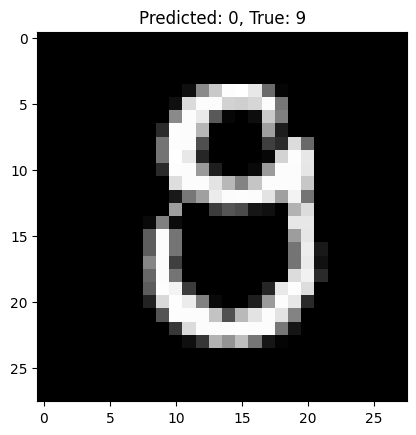

  Wrong prediction. Dataset line: 851


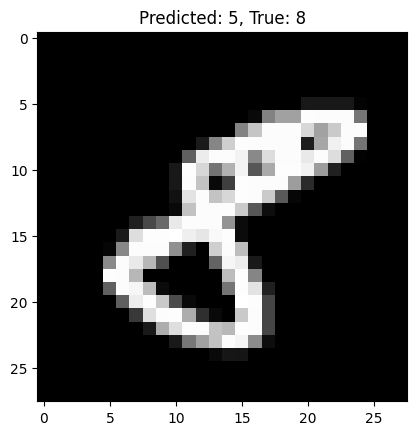

  Wrong prediction. Dataset line: 859


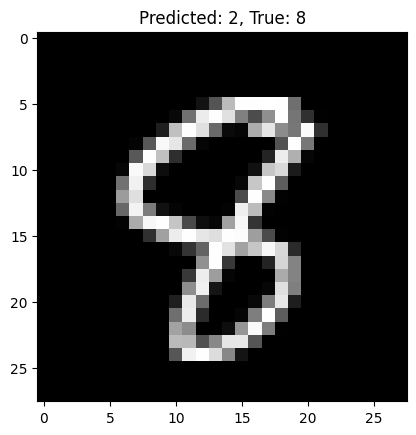

  Wrong prediction. Dataset line: 885


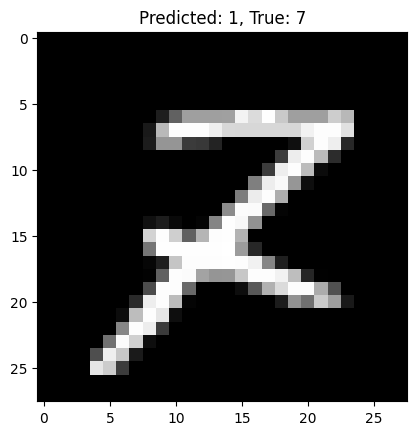

  Wrong prediction. Dataset line: 898


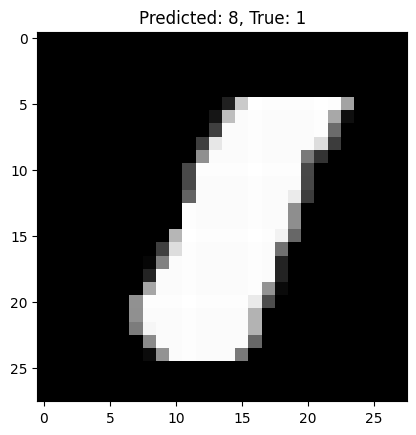

  Wrong prediction. Dataset line: 919


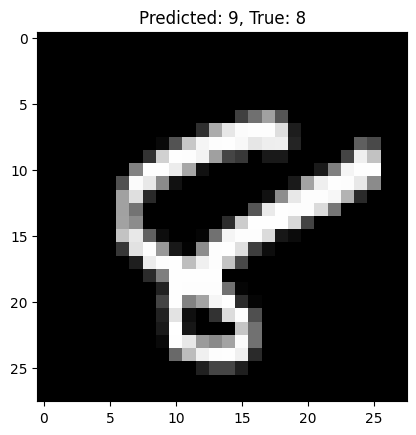

  Wrong prediction. Dataset line: 929


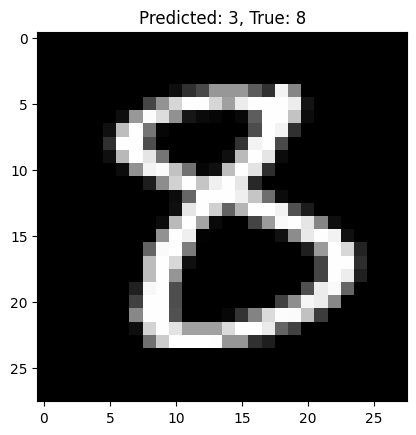

  Wrong prediction. Dataset line: 956


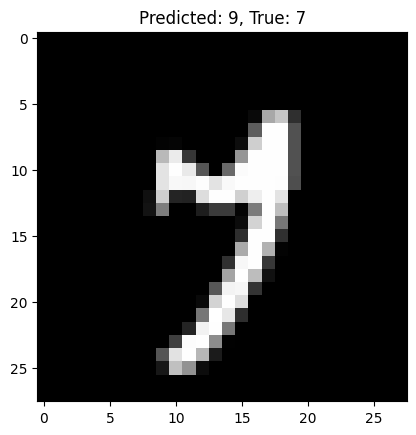

  Wrong prediction. Dataset line: 1016


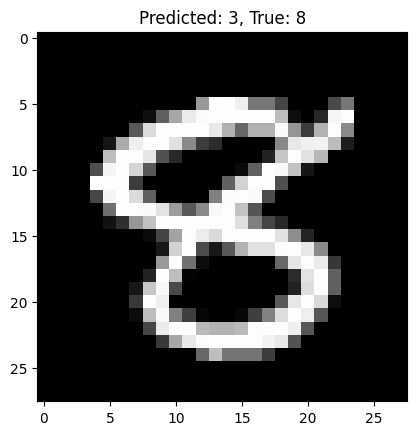

  Wrong prediction. Dataset line: 1017


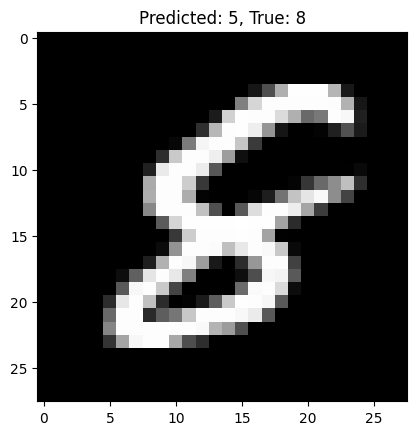

  Wrong prediction. Dataset line: 1032


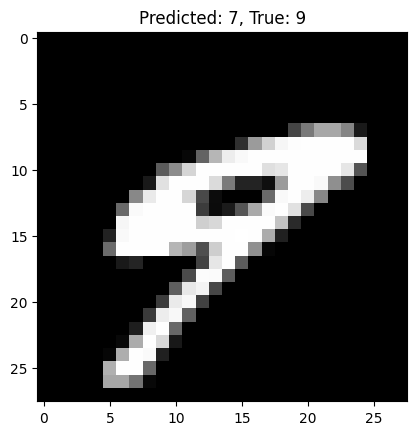

  Wrong prediction. Dataset line: 1051


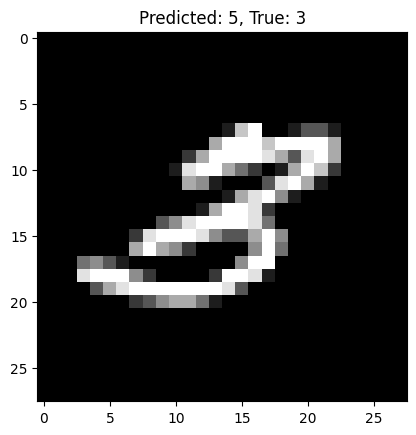

  Wrong prediction. Dataset line: 1083


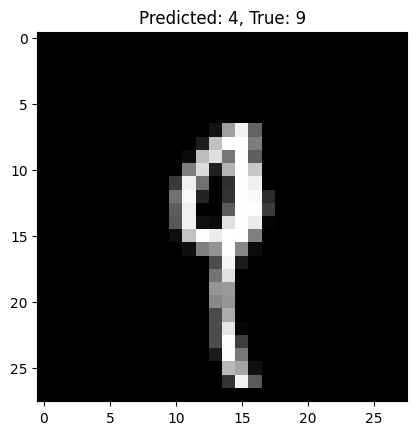

  Wrong prediction. Dataset line: 1148


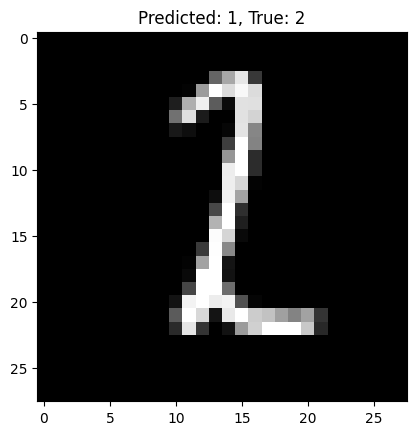

  Wrong prediction. Dataset line: 1173


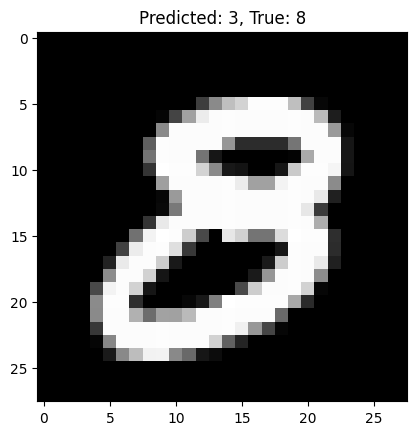

  Wrong prediction. Dataset line: 1177


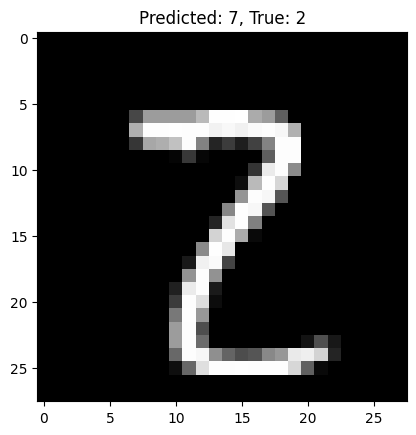

  Wrong prediction. Dataset line: 1239


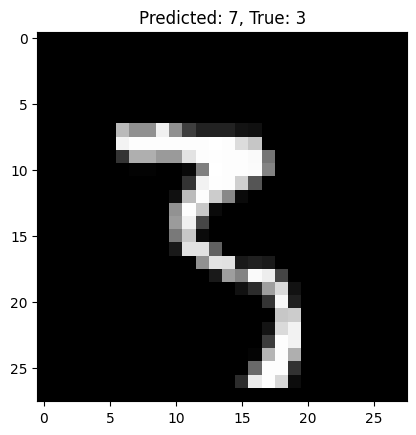

  Wrong prediction. Dataset line: 1300


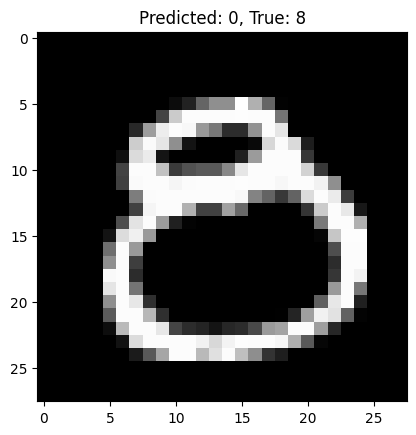

  Wrong prediction. Dataset line: 1337


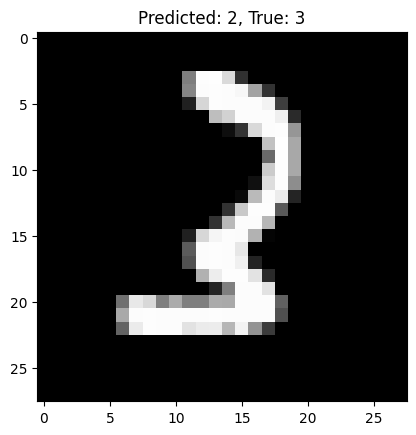

  Wrong prediction. Dataset line: 1403


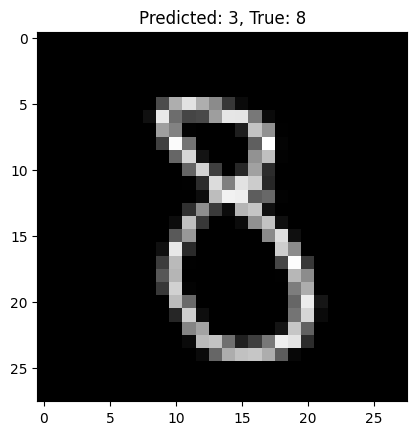

  Wrong prediction. Dataset line: 1470


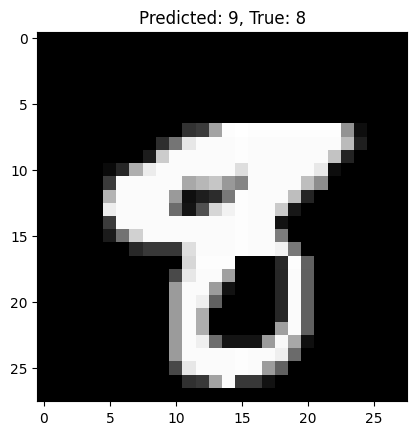

  Wrong prediction. Dataset line: 1610


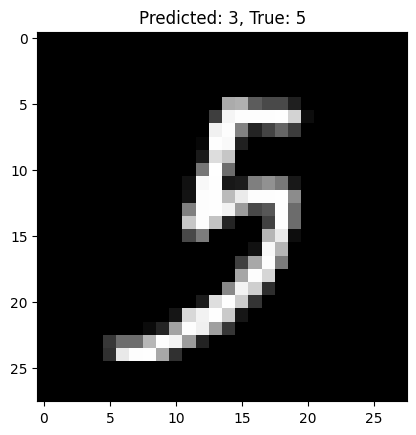

  Wrong prediction. Dataset line: 1636


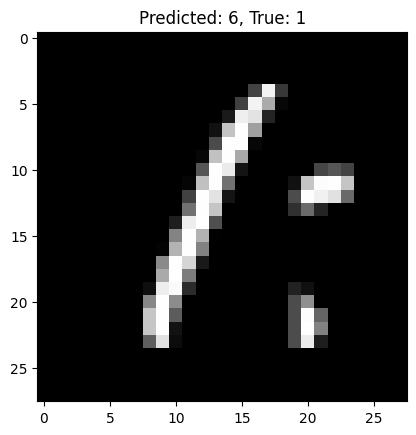

  Wrong prediction. Dataset line: 1654


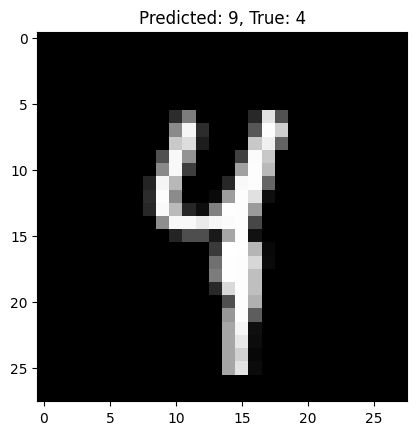

  Wrong prediction. Dataset line: 1677


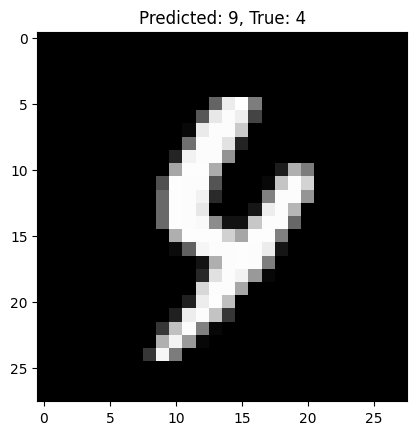

  Wrong prediction. Dataset line: 1702


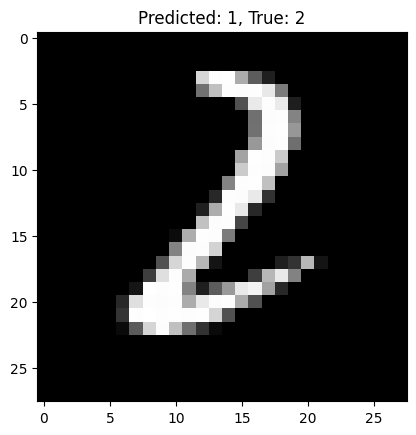

  Wrong prediction. Dataset line: 1742


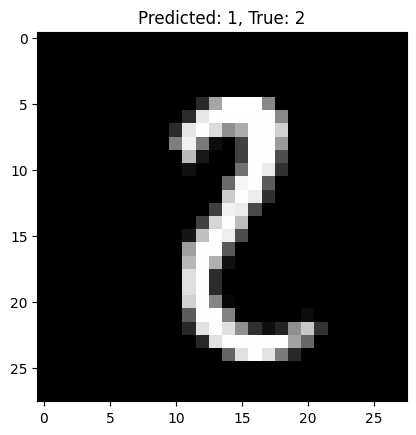

  Wrong prediction. Dataset line: 1760


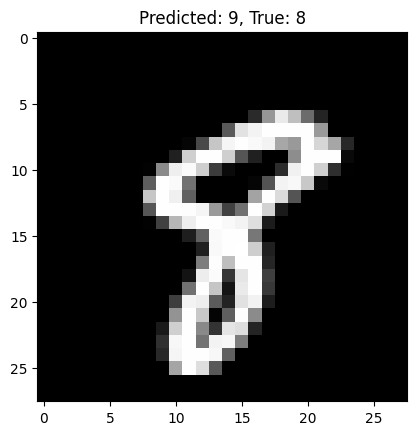

  Wrong prediction. Dataset line: 1775


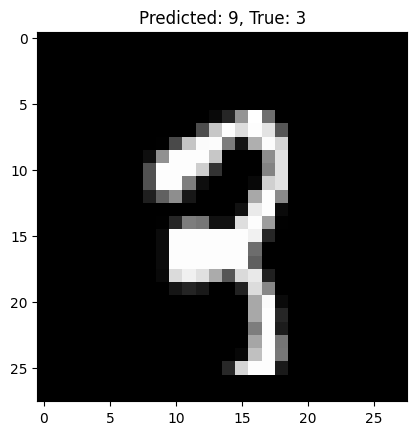

  Wrong prediction. Dataset line: 1795


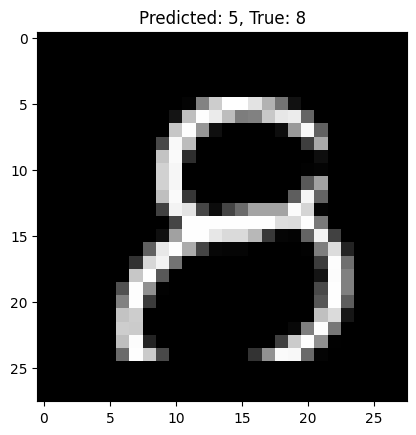

  Wrong prediction. Dataset line: 1796


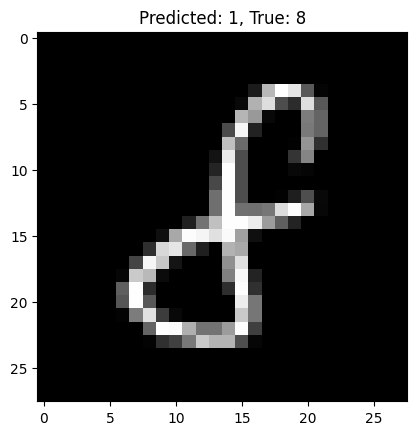

  Wrong prediction. Dataset line: 1824


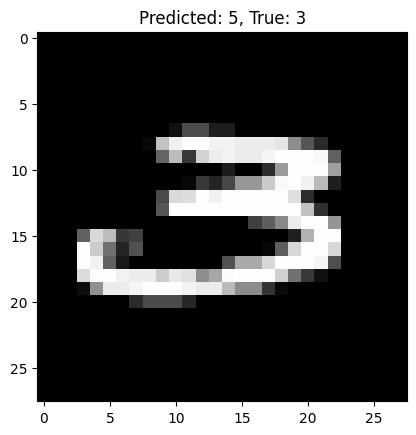

  Wrong prediction. Dataset line: 1835


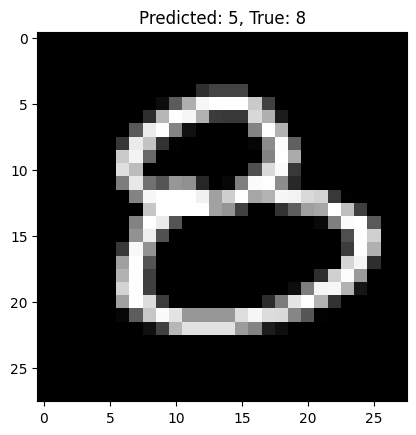

  Wrong prediction. Dataset line: 1872


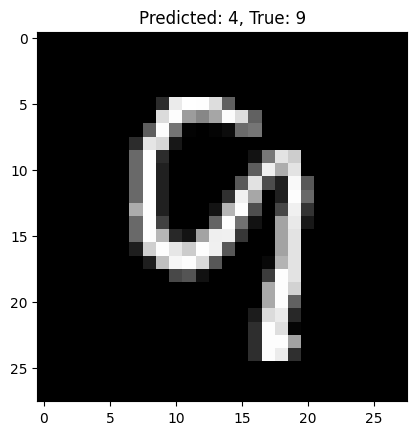

  Wrong prediction. Dataset line: 1936


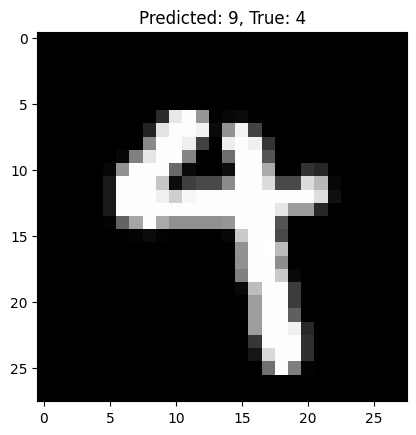

  Wrong prediction. Dataset line: 2031


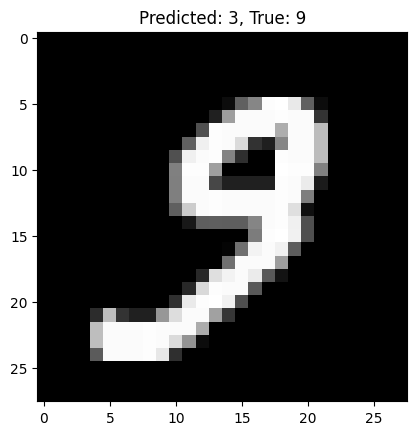

  Wrong prediction. Dataset line: 2091


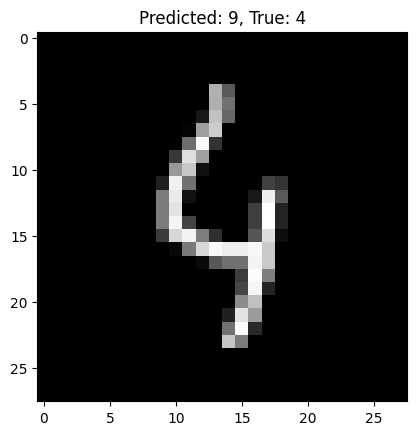

  Wrong prediction. Dataset line: 2117


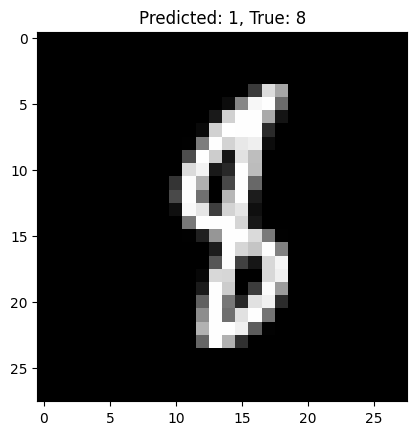

  Wrong prediction. Dataset line: 2154


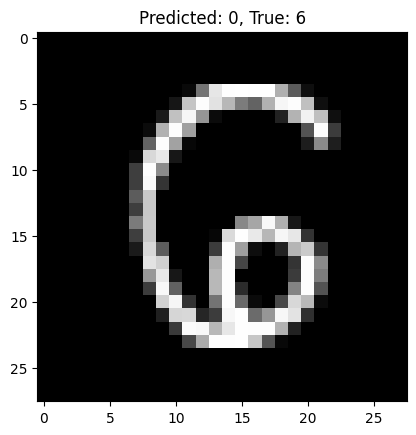

  Wrong prediction. Dataset line: 2159


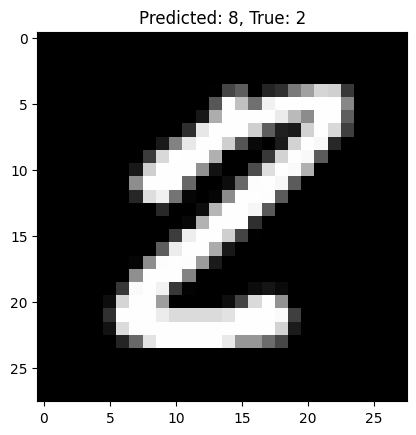

  Wrong prediction. Dataset line: 2221


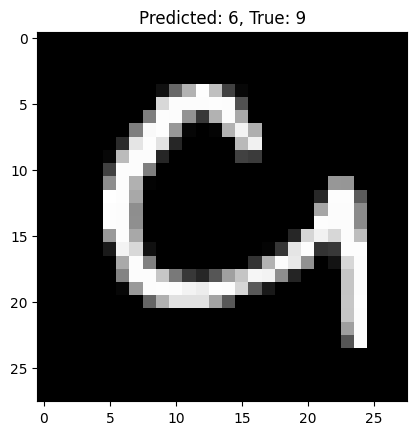

  Wrong prediction. Dataset line: 2285


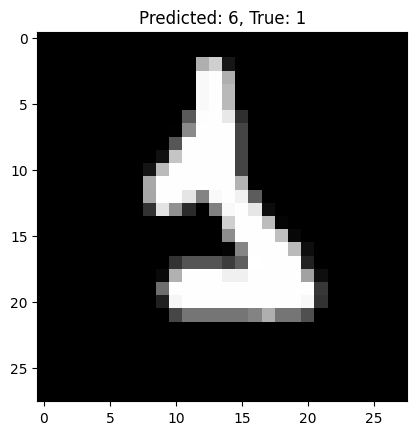

  Wrong prediction. Dataset line: 2297


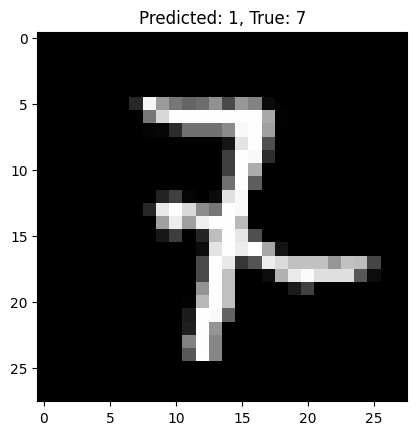

  Wrong prediction. Dataset line: 2317


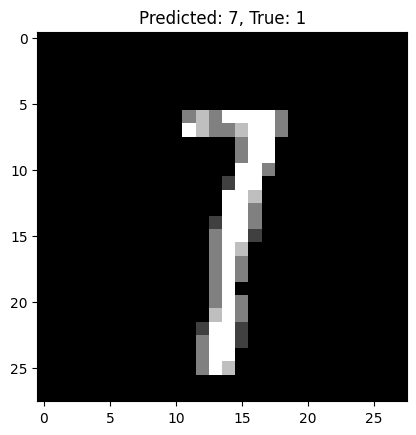

  Wrong prediction. Dataset line: 2327


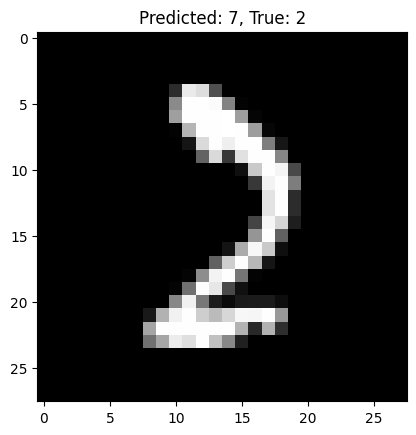

  Wrong prediction. Dataset line: 2334


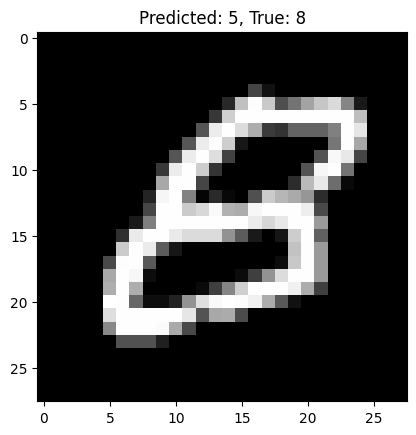

  Wrong prediction. Dataset line: 2382


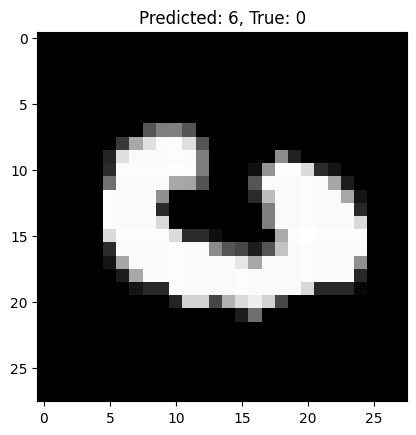

  Wrong prediction. Dataset line: 2390


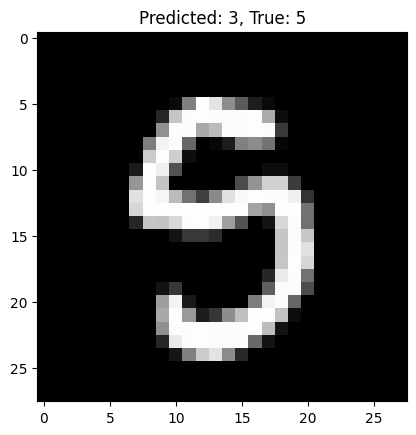

  Wrong prediction. Dataset line: 2437


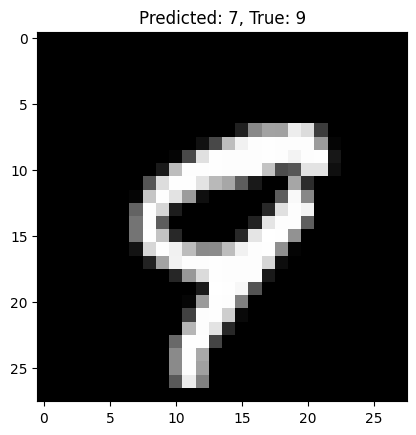

  Wrong prediction. Dataset line: 2448


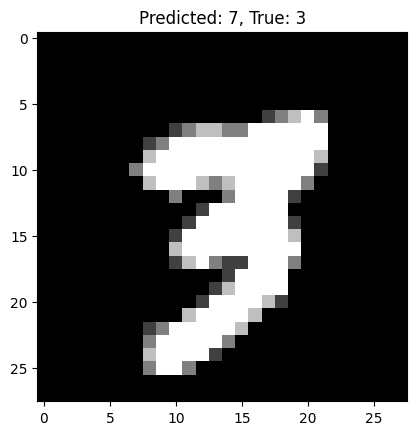

  Wrong prediction. Dataset line: 2507


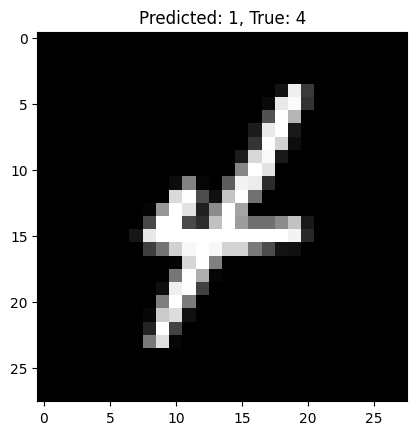

  Wrong prediction. Dataset line: 2629


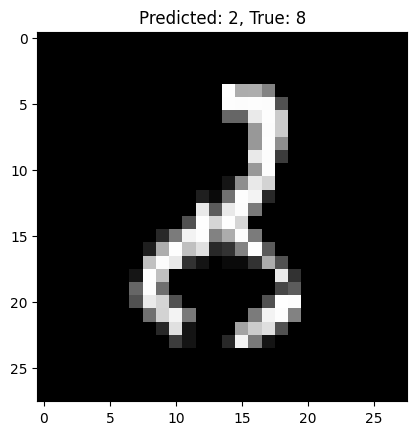

  Wrong prediction. Dataset line: 2707


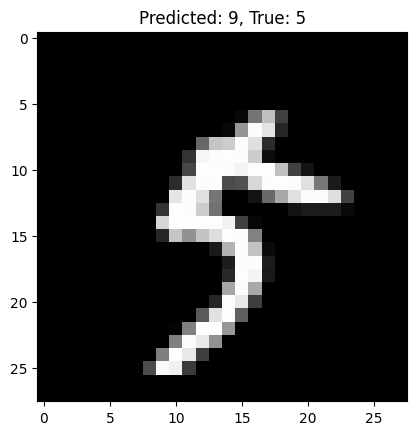

  Wrong prediction. Dataset line: 2714


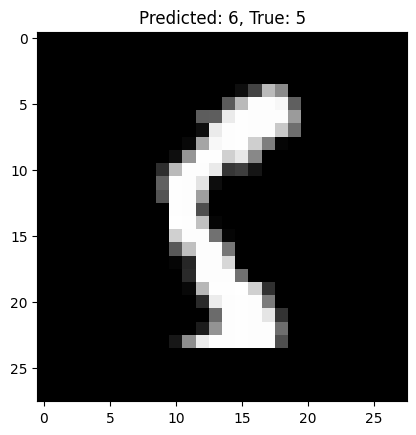

  Wrong prediction. Dataset line: 2723


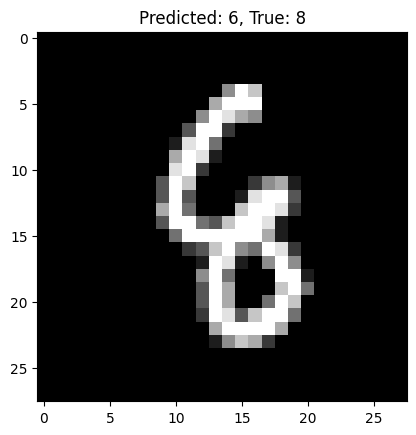

  Wrong prediction. Dataset line: 2821


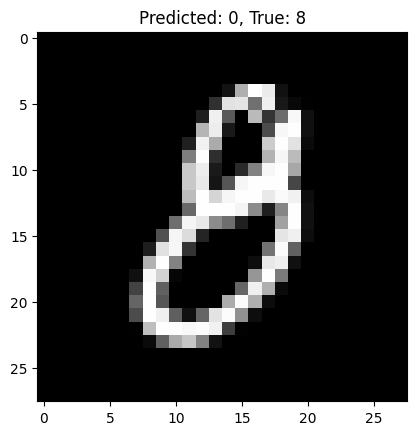

  Wrong prediction. Dataset line: 2864


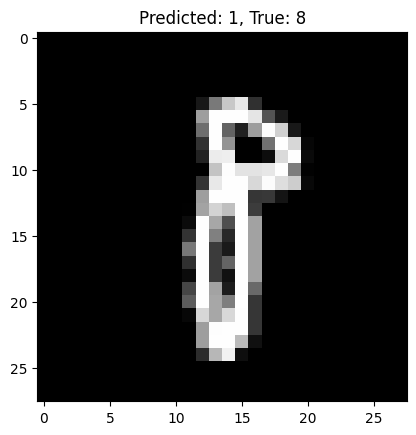

  Wrong prediction. Dataset line: 2868


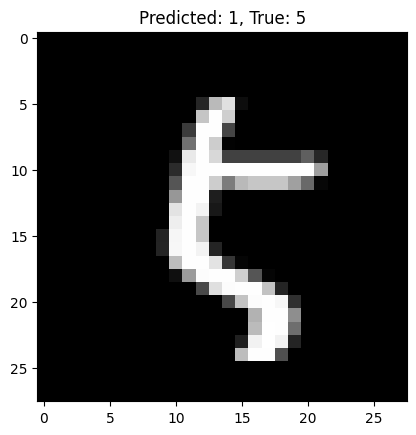

  Wrong prediction. Dataset line: 2875


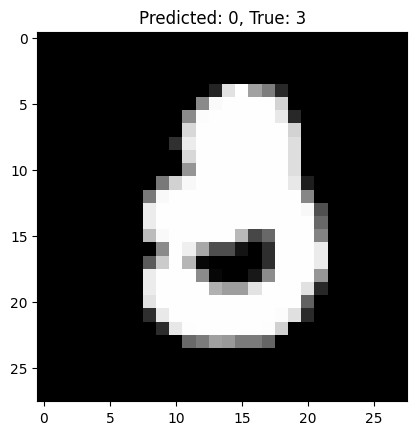

  Wrong prediction. Dataset line: 2905


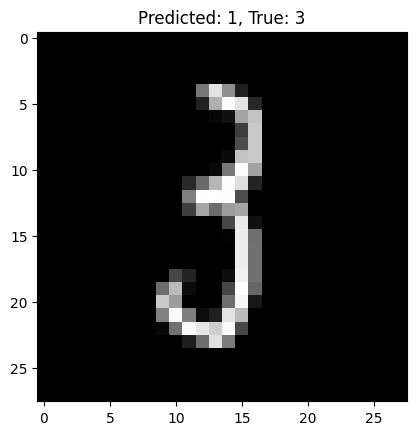

  Wrong prediction. Dataset line: 2914


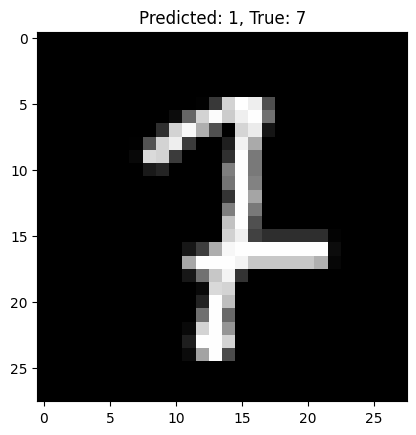

  Wrong prediction. Dataset line: 2915


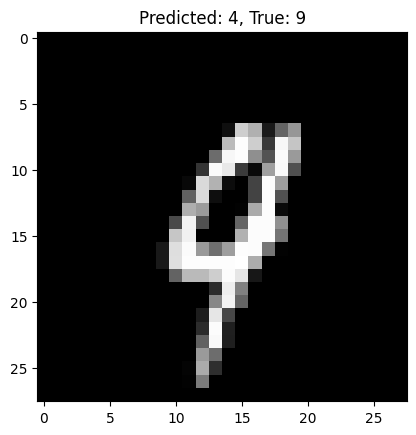

  Wrong prediction. Dataset line: 2922


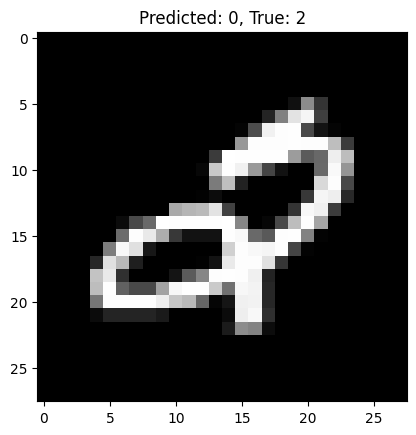

  Wrong prediction. Dataset line: 2941


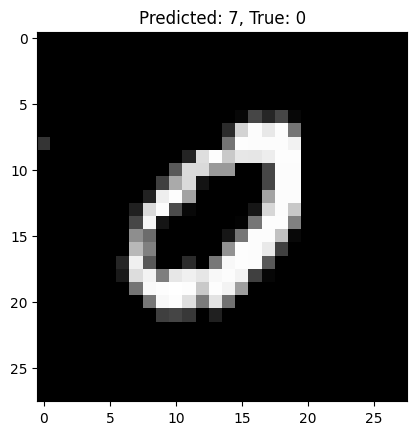

  Wrong prediction. Dataset line: 3073


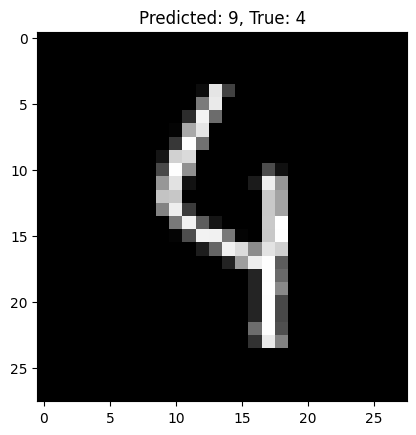

  Wrong prediction. Dataset line: 3079


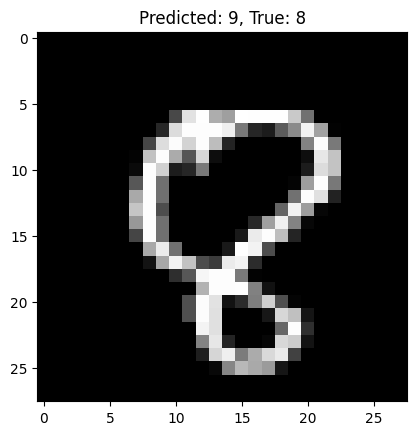

  Wrong prediction. Dataset line: 3098


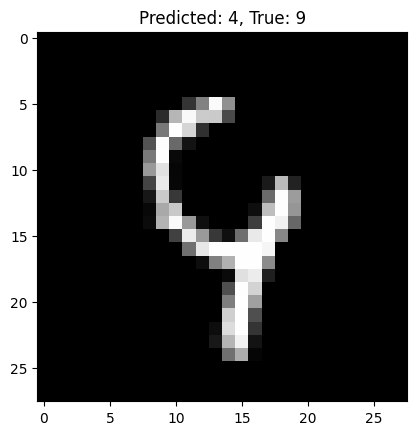

  Wrong prediction. Dataset line: 3177


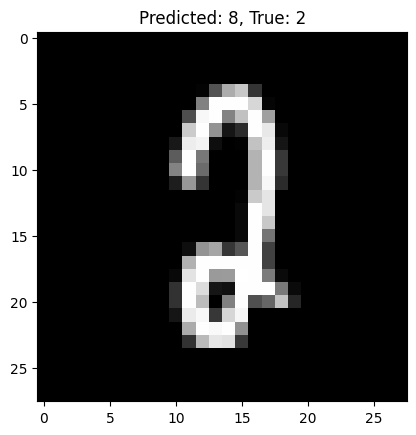

  Wrong prediction. Dataset line: 3209


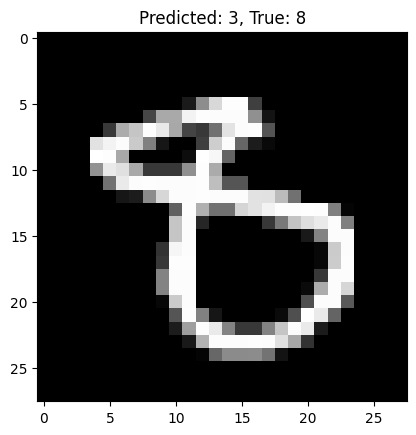

  Wrong prediction. Dataset line: 3217


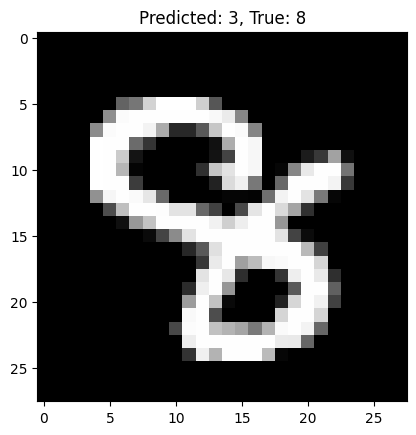

  Wrong prediction. Dataset line: 3230


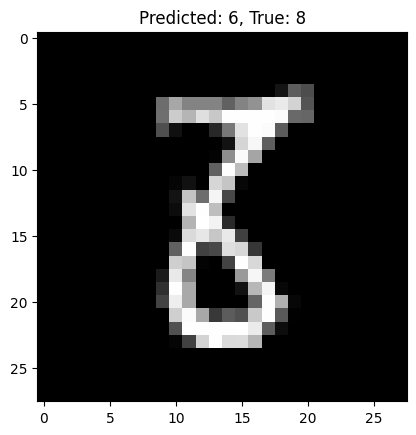

  Wrong prediction. Dataset line: 3233


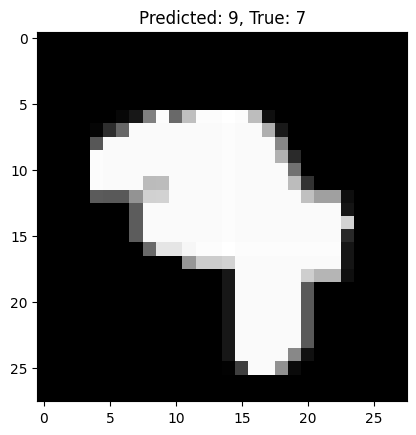

  Wrong prediction. Dataset line: 3268


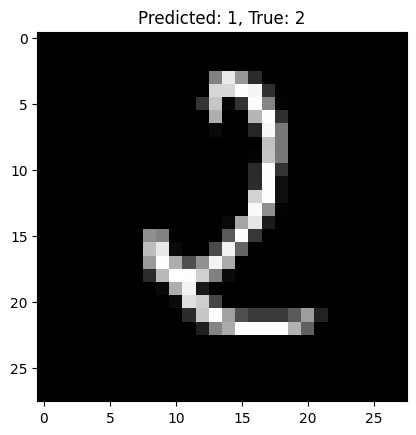

  Wrong prediction. Dataset line: 3304


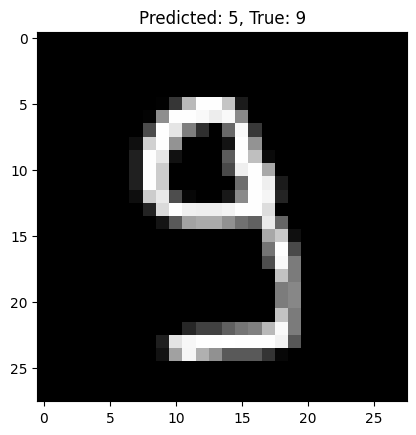

  Wrong prediction. Dataset line: 3330


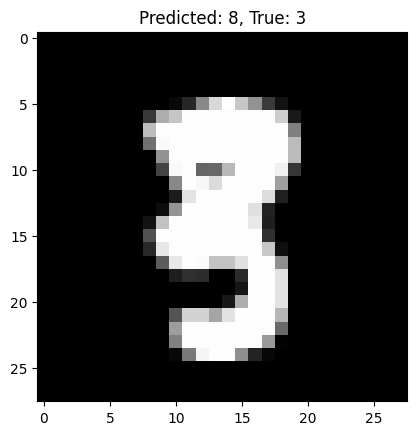

  Wrong prediction. Dataset line: 3383


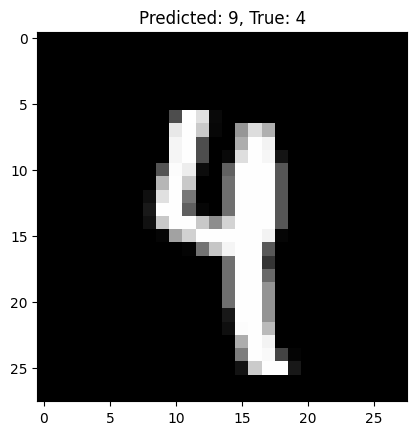

  Wrong prediction. Dataset line: 3386


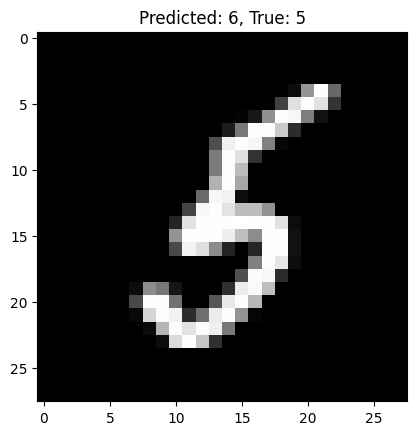

  Wrong prediction. Dataset line: 3437


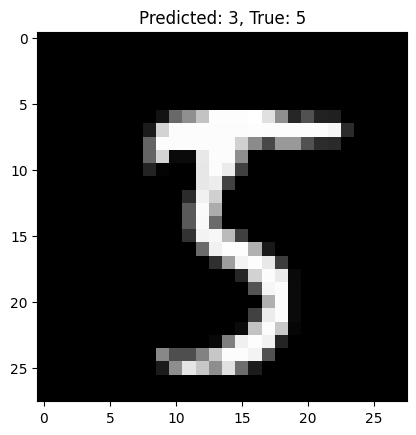

  Wrong prediction. Dataset line: 3544


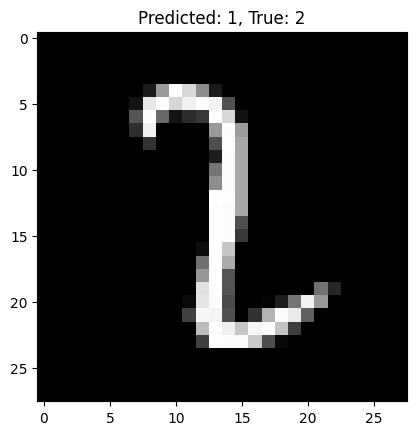

  Wrong prediction. Dataset line: 3558


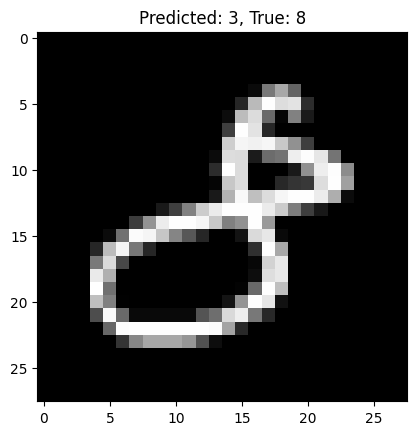

  Wrong prediction. Dataset line: 3564


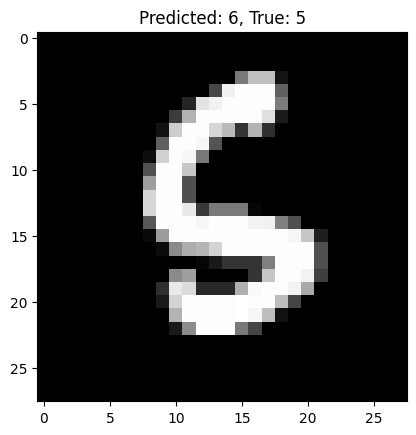

  Wrong prediction. Dataset line: 3566


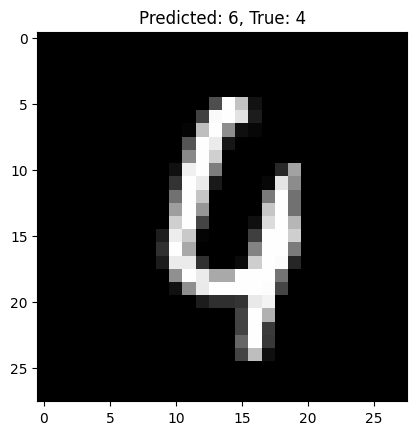

  Wrong prediction. Dataset line: 3604


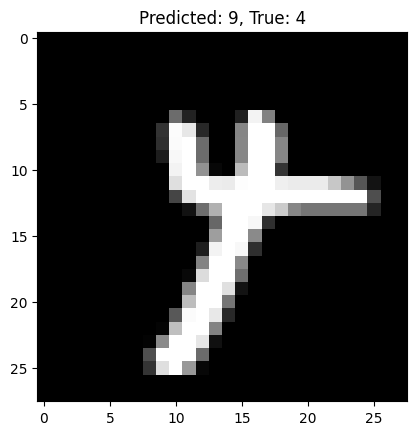

  Wrong prediction. Dataset line: 3622


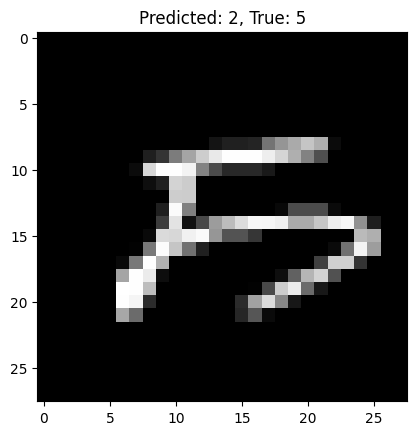

  Wrong prediction. Dataset line: 3673


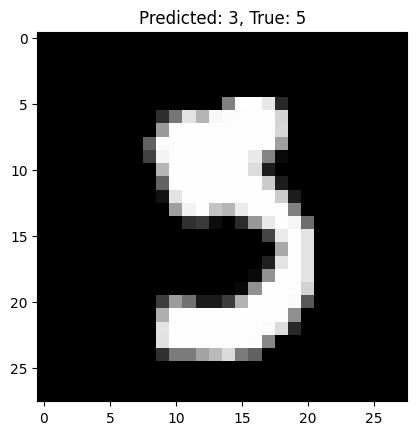

  Wrong prediction. Dataset line: 3684


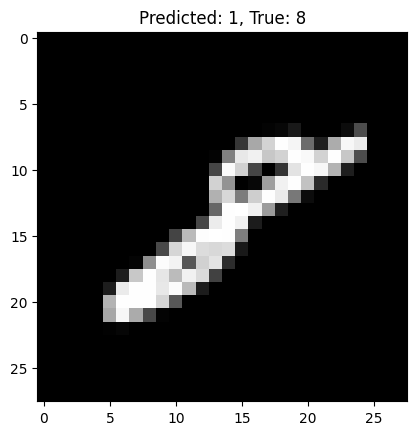

  Wrong prediction. Dataset line: 3693


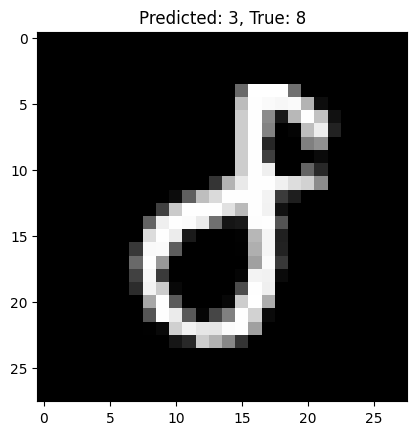

  Wrong prediction. Dataset line: 3710


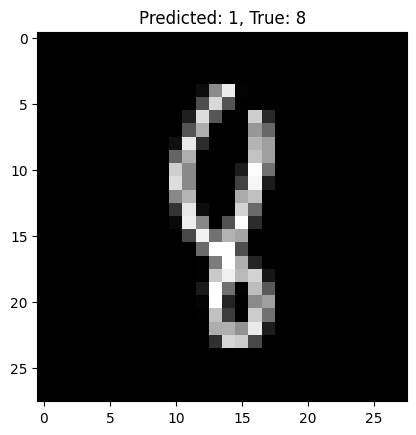

  Wrong prediction. Dataset line: 3713


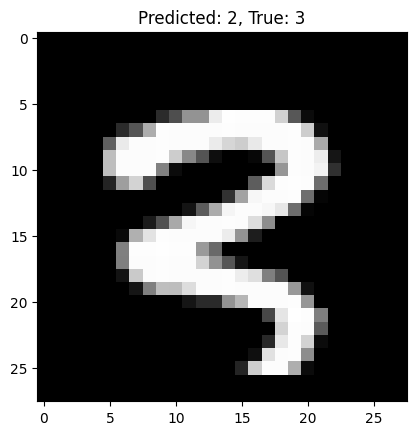

  Wrong prediction. Dataset line: 3716


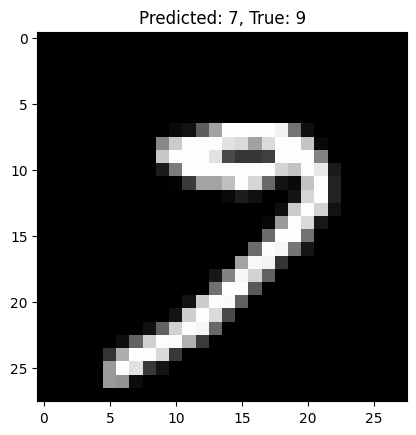

  Wrong prediction. Dataset line: 3749


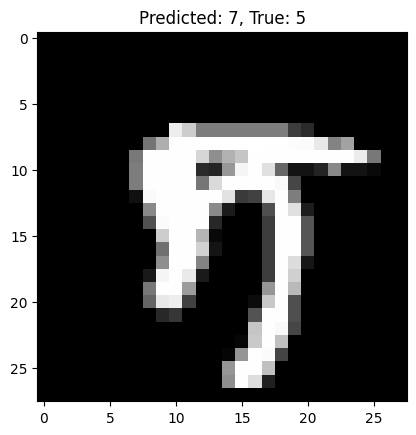

  Wrong prediction. Dataset line: 3760


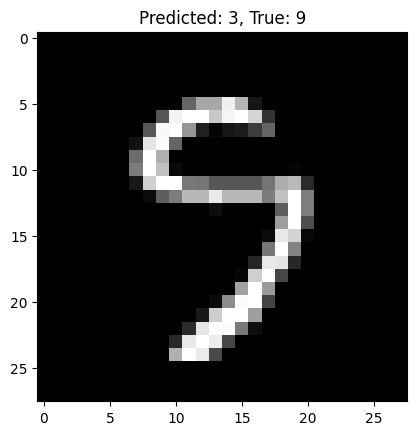

  Wrong prediction. Dataset line: 3762


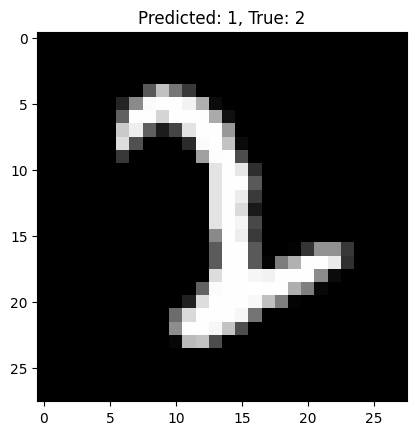

  Wrong prediction. Dataset line: 3771


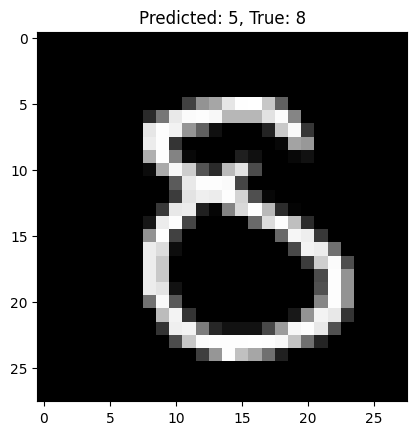

  Wrong prediction. Dataset line: 3814


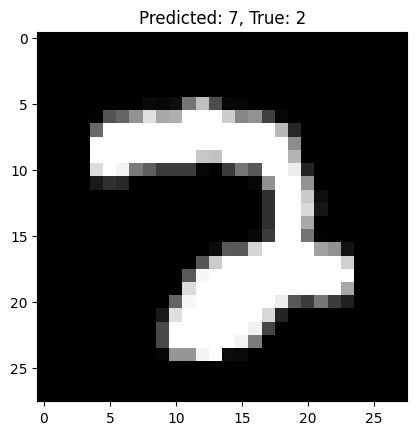

  Wrong prediction. Dataset line: 3847


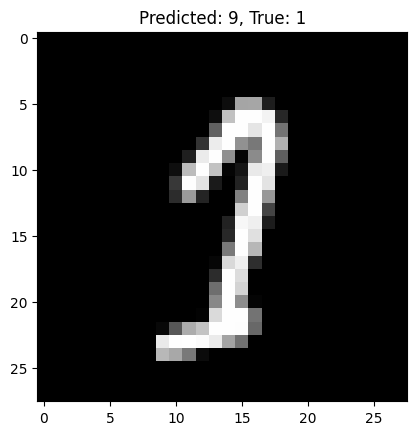

  Wrong prediction. Dataset line: 3852


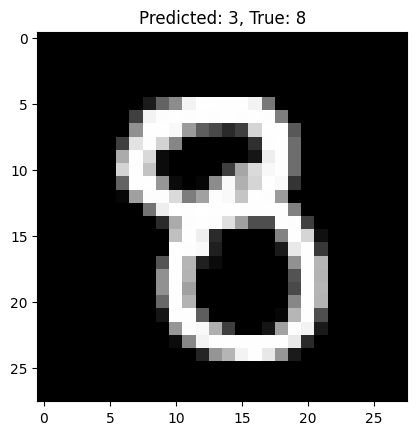

  Wrong prediction. Dataset line: 3865


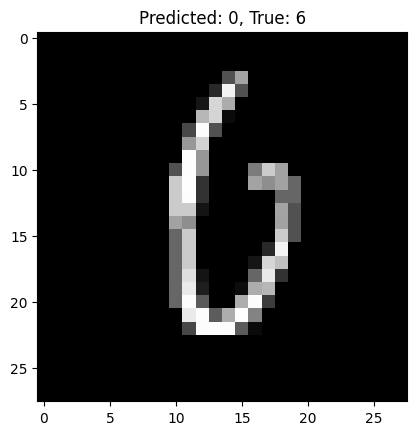

  Wrong prediction. Dataset line: 3961


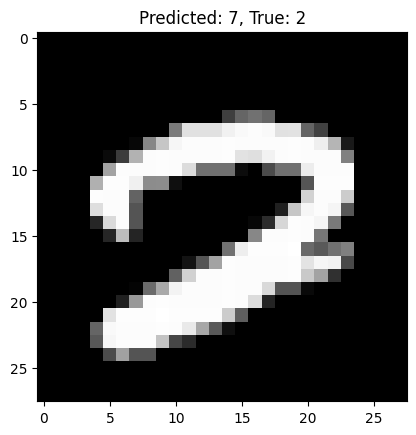

  Wrong prediction. Dataset line: 3998


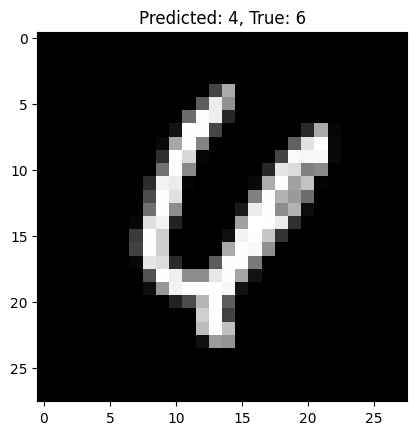

Accuracy: 0.9705


In [5]:
# Train the model on the full training data using the best k value
knn = KNN(k=5)
knn.fit(train_data, train_labels)

# Use the model to make predictions on the test data
y_pred = knn.predict(test_data, true_labels=test_labels)

# Evaluate the accuracy of the model
accuracy = np.mean(y_pred == test_labels)
print("Accuracy:", accuracy)